In [11]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [12]:
def rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def bgr(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

def gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def disp(img, title='', s=8, vmin=None, vmax=None):
    plt.figure(figsize=(s,s))
    plt.axis('off')
    if vmin is not None and vmax is not None:
        plt.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

def uint8ify(img):
    img -= img.min()
    img /= img.max()
    img *= 255
    return np.uint8(img)

def overlay(a,b):
    # a and b should be float images and between 0-1

    mask = a >= 0.5 # generate boolean mask of everywhere a > 0.5 
    ab = np.zeros_like(a) # generate an output container for the blended image 

    # now do the blending 
    ab[~mask] = (2*a*b)[~mask] # 2ab everywhere a<0.5
    ab[mask] = (1-2*(1-a)*(1-b))[mask] # else this
    
    return ab

def before_after(img_a, img_b, name='', vmin=None, vmax=None, effect_name='Processed'):
    fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(10,4))
    axs[0].axis('off')
    axs[1].axis('off')
    axs[0].set_title(f'{name} Original')
    axs[1].set_title(f'{name} {effect_name}')
    if vmin is not None and vmax is not None:
        axs[0].imshow(img_a, cmap='gray', vmin=vmin, vmax=vmax)
        axs[1].imshow(img_b, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        axs[0].imshow(img_a, cmap='gray')
        axs[1].imshow(img_b, cmap='gray')
    plt.show()

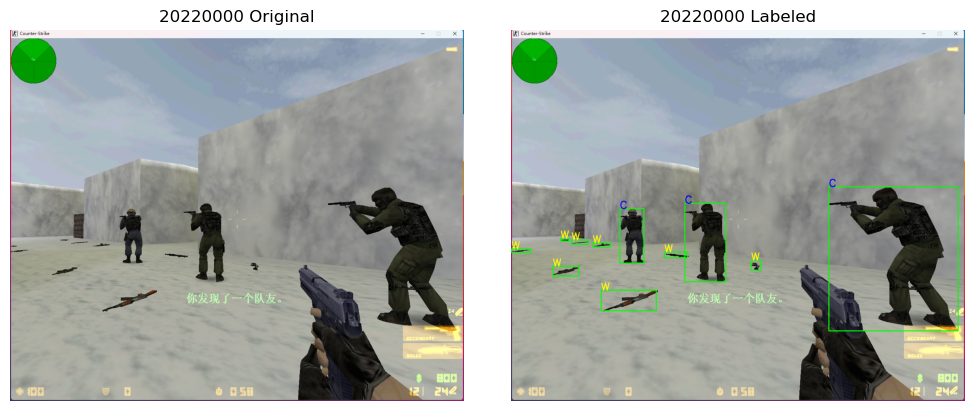

In [14]:
image_id = 0
image_name = f"2022{image_id:>04}"
image_path = f"../dataset/images/{image_name}.png"
label_path = f"../dataset/labels/{image_name}.txt"

# Load the image and its labels
img = rgb(cv2.imread(image_path))
labels = np.loadtxt(label_path, dtype=np.float32)

# Draw a rectangle for each label
img_drawn = img.copy()
for label in labels:
    ind, x, y, w, h = label
    x = int(x * img.shape[1])
    y = int(y * img.shape[0])
    w = int(w * img.shape[1])
    h = int(h * img.shape[0])

    # Color and text for each class of  object
    colors = [(0,0,255), (0,255,0), (255,0,0), (255,255,0)]
    id_texts = ["C", "D", "T", "W"]
    color = colors[int(ind)]
    text = id_texts[int(ind)]

    # Draw!
    cv2.rectangle(img_drawn, (x-w//2, y-h//2), (x+w//2, y+h//2), (0,255,0), 2)
    cv2.putText(img_drawn, text, (x-w//2, y-h//2), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

# disp(img_drawn, 'Labeled')
before_after(img, img_drawn, name=image_name, effect_name='Labeled')